In [ ]:
import pandas as pd
import numpy as np
# next i am just taking the dataset url because it will save my time and space
url = 'https://raw.githubusercontent.com/611noorsaeed/Resume-Screening-App/refs/heads/main/UpdatedResumeDataSet.csv'

In [3]:
df = pd.read_csv(url)
df.sample(5)

,Category,Resume
331,Java Developer,SKILLS: - 1) Team leading 2) Self-motivated 3)...
849,DotNet Developer,"Technologies ASP.NET, MVC 3.0/4.0/5.0, Unit Te..."
921,Testing,COMPUTER PROFICIENCY â¢ Basic: MS-Office (Pow...
68,HR,Education Details \r\n MBA ACN College of en...
932,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
import matplotlib.pyplot as plt

In [5]:
df.shape

(962, 2)

In [ ]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

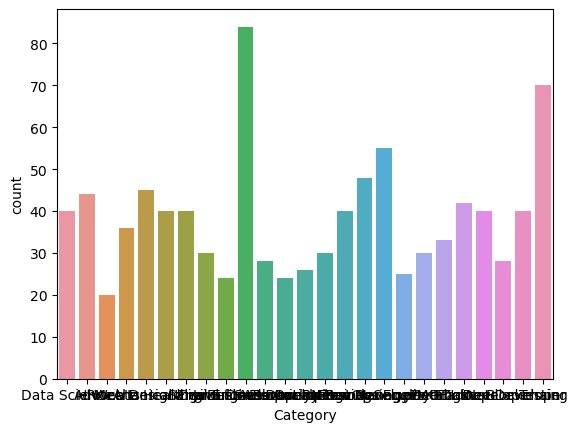

In [6]:
import seaborn as sns
sns.countplot(x='Category', data=df)

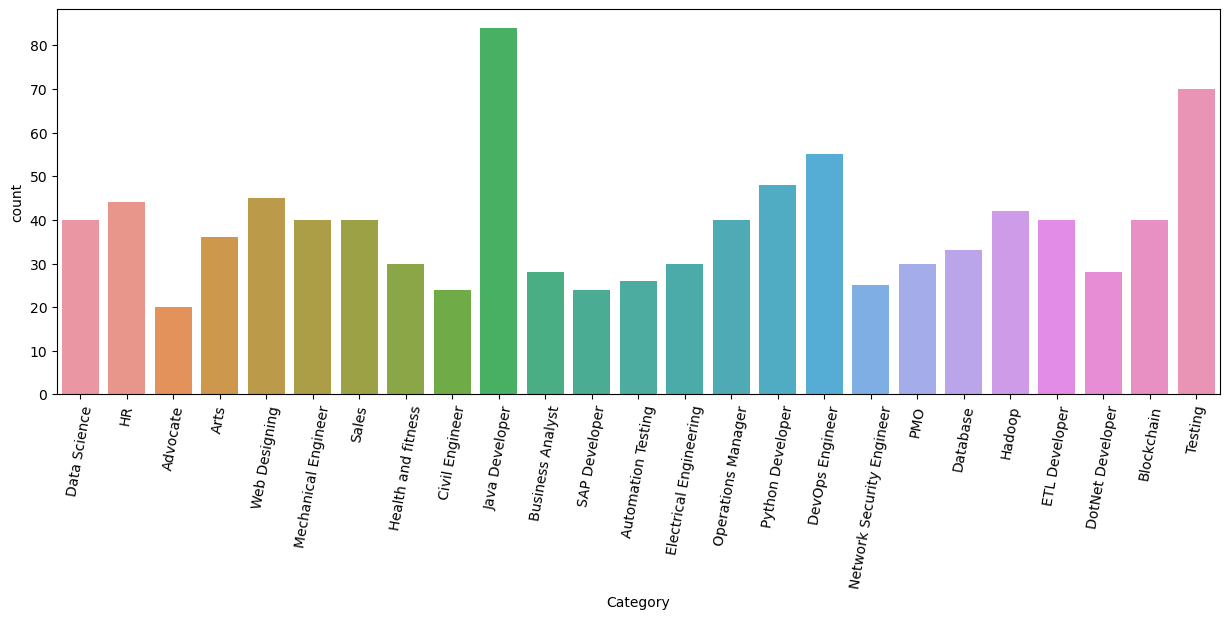

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='Category', data=df)
plt.xticks(rotation=80)
plt.show()

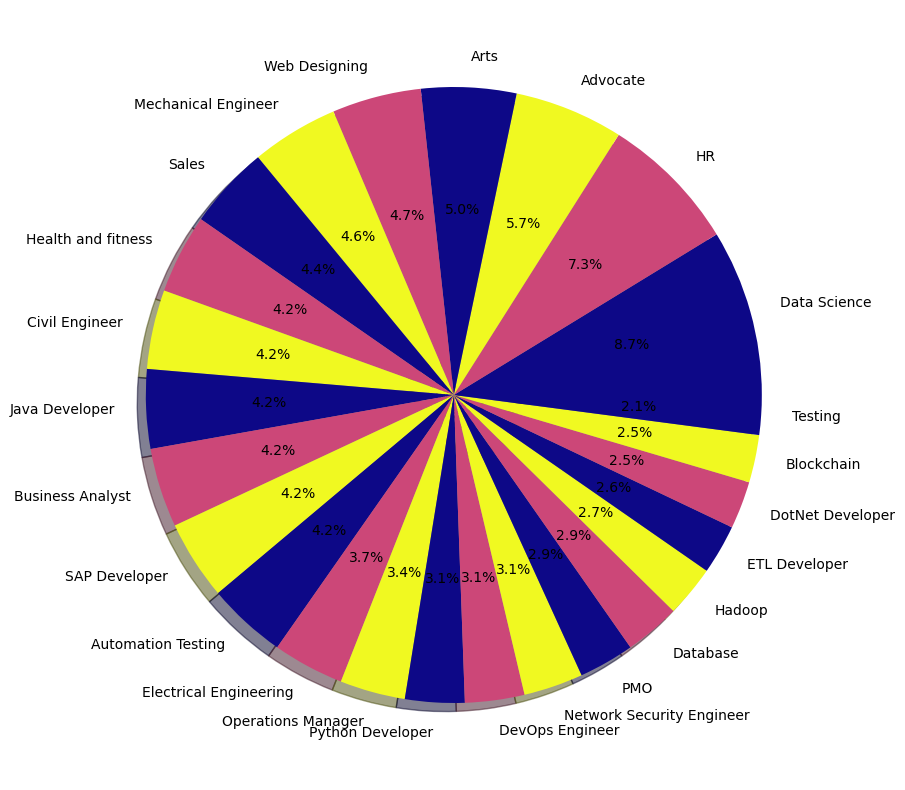

In [7]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts, labels=labels,autopct='%1.1f%%', shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

In [ ]:
df['Category'][0]

'Data Science'

In [ ]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [8]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [ ]:
cleanResume("my ### #noor website is like this http://helloword and access it @gmail.com")

'my     website is like this  and access it  '

In [9]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [12]:
type(df['Resume'][0])

str

In [14]:
# now words into categoriacal value
# df['Category']
df
# this is a supervised learning problem, bcz 1 output feature hai aur ek input feature hai , koi hame resume dega toh hamm bata denge ki konsi field se hein voh bhai
# classification

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,Testing,Computer Skills Proficient in MS office Word B...
958,Testing,Willingness to a ept the challenges Positive ...
959,Testing,PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [17]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to a ept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [19]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])

In [ ]:
# requiredText


<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2, random_state=42)

In [26]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((769, 7351), (769,), (193, 7351), (193,))

In [32]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
# print(ypred)
print(accuracy_score(y_test, ypred))

0.9844559585492227


In [ ]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl', 'wb'))
pickle.dump(clf,open('clf.pkl', 'wb'))

In [35]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""



In [37]:
import pickle

# load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# clean the input resume
cleaned_resume = cleanResume(myresume)

# transformed the clean resume using the trained tfidfvectorizer
input_features = tfidf.transform([cleaned_resume])

# make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]


category_mapping = {
    15: "java dev",
    23: "testing", 
    8: "devops eng",
    20: "python dev",
    24:"web designing",
    12:"hr",
    13:"hadoop",
    3:"blockchain",
    10: "etl dev",
    18: "operations eng",
    6: "data science",
    22: "sales",
    16: "mech eng",
    1: "arts",
    7 : "database",
    11: "electrical eng",
    14: "health and fitness",
    19:"pwo",
    4:"business analyst",
    9:"dotnet dev",
    2 : "automation testing",
    17: "network security eng",
    21: "sap dev",
    5: "civil eng",
    0 : "advocate"
}

category_name = category_mapping.get(prediction_id, "Unknown")
print("Predicted category : ", category_name)
print(prediction_id)

Predicted category :  data science
6
